In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Data_Cleaner import data_loader_main
import pysindy as psd
from SINDy import SINDy_Train
from utilis_2D import params

In [2]:
total_sim_step = params['total_sim_step']
control_interval = params['control_interval']
burnin_step = params['burnin_step']
burnin_control_step = int(burnin_step/control_interval) # calculate the control step that are within the burnin period

In [3]:
flow_all, _, occupancy_all, flow_dt, _, occupancy_dt = data_loader_main(csv_dict='Sim_Results/Ramp_ALIANA')
flow_all_MPC, _, occupancy_all_MPC, flow_dt_MPC, _, occupancy_dt_MPC = data_loader_main(csv_dict='Sim_Results/Ramp_MPCRefine4')

In [4]:
control_input = pd.read_csv('Results/Meter_Rate_ALIANA.csv')
control_input = control_input/10

control_input_MPC = pd.read_csv('Results/Meter_Rate_MPCRefine4.csv')
control_input_MPC = control_input_MPC/10

In [5]:
occupancy_all.rename(columns={"H10E_1": "CA-134E #1", "H10E_2": "CA-134E #2", "H10E_3": "CA-134E #3", "H15N_1": "I-5N #1", "H15N_2": "I-5N #2", "H25S_1": "CA-2S #1", "H25S_2": "CA-2S #2", "H25S_3": "CA-2S #3"}, inplace=True)
occupancy_dt.rename(columns={"H10E_1": "CA-134E #1", "H10E_2": "CA-134E #2", "H10E_3": "CA-134E #3", "H15N_1": "I-5N #1", "H15N_2": "I-5N #2", "H25S_1": "CA-2S #1", "H25S_2": "CA-2S #2", "H25S_3": "CA-2S #3"}, inplace=True)

occupancy_all_MPC.rename(columns={"H10E_1": "CA-134E #1", "H10E_2": "CA-134E #2", "H10E_3": "CA-134E #3", "H15N_1": "I-5N #1", "H15N_2": "I-5N #2", "H25S_1": "CA-2S #1", "H25S_2": "CA-2S #2", "H25S_3": "CA-2S #3"}, inplace=True)

occupancy_dt_MPC.rename(columns={"H10E_1": "CA-134E #1", "H10E_2": "CA-134E #2", "H10E_3": "CA-134E #3", "H15N_1": "I-5N #1", "H15N_2": "I-5N #2", "H25S_1": "CA-2S #1", "H25S_2": "CA-2S #2", "H25S_3": "CA-2S #3"}, inplace=True)

In [6]:
occupancy_all, occupancy_dt = occupancy_all.iloc[burnin_control_step:, :], occupancy_dt.iloc[burnin_control_step:, :]
control_input = control_input.iloc[burnin_control_step:, :]

occupancy_all_MPC, occupancy_dt_MPC = occupancy_all_MPC.iloc[burnin_control_step:, :], occupancy_dt_MPC.iloc[burnin_control_step:, :]
control_input_MPC = control_input_MPC.iloc[burnin_control_step:, :]

occupancy_all, occupancy_dt = occupancy_all.iloc[:-1, :].reset_index(drop=True), occupancy_dt.iloc[:-1, :].reset_index(drop=True)
control_input = control_input.iloc[1:,:].reset_index(drop=True)

occupancy_all_MPC, occupancy_dt_MPC = occupancy_all_MPC.iloc[:-1, :].reset_index(drop=True), occupancy_dt_MPC.iloc[:-1, :].reset_index(drop=True)
control_input_MPC = control_input_MPC.iloc[1:,:].reset_index(drop=True)

## SINDY

In [7]:
model = SINDy_Train(x = occupancy_all, dx = occupancy_dt, u = control_input, threshold= 0.0002)

In [8]:
model.print()

(x0)' = 0.001 x0^2 + 0.001 x0 x1 + -0.005 x0 x2 + 0.003 x0 x6 + 0.004 x0 u0 + -0.001 x0 u1 + -0.005 x0 u2 + -0.001 x0 u3 + 0.001 x0 u4 + 0.003 x1^2 + -0.006 x1 x2 + -0.001 x1 x3 + 0.002 x1 x4 + -0.002 x1 x5 + 0.002 x1 x6 + 0.002 x1 x7 + -0.002 x1 u0 + 0.004 x1 u1 + 0.003 x1 u3 + 0.001 x1 u4 + -0.001 x1 u5 + 0.002 x2^2 + -0.002 x2 x3 + -0.002 x2 x4 + 0.003 x2 x5 + -0.005 x2 x6 + 0.002 x2 x7 + 0.001 x2 u0 + -0.004 x2 u1 + 0.002 x2 u2 + 0.001 x2 u3 + -0.002 x2 u4 + -0.002 x2 u5 + -0.001 x3^2 + -0.001 x3 x4 + -0.001 x3 x5 + -0.001 x3 x6 + -0.005 x3 u0 + -0.001 x3 u1 + -0.001 x3 u3 + -0.001 x3 u4 + -0.001 x3 u5 + -0.001 x4^2 + 0.001 x4 x5 + -0.002 x4 x6 + 0.001 x4 x7 + 0.001 x4 u0 + 0.002 x4 u1 + -0.001 x4 u2 + -0.003 x4 u3 + -0.002 x4 u4 + -0.001 x4 u5 + -0.002 x5^2 + 0.001 x5 x7 + 0.001 x5 u0 + -0.003 x5 u1 + -0.004 x5 u3 + -0.002 x5 u4 + -0.002 x5 u5 + 0.003 x6^2 + 0.001 x6 u0 + -0.001 x6 u2 + 0.003 x6 u3 + -0.003 x6 u4 + -0.001 x6 u5 + 0.001 x7^2 + 0.005 x7 u0 + -0.002 x7 u1 + -0.002 x7

In [9]:
# Predict derivatives using the learned model
occupancy_dt_pred = model.predict(occupancy_all, u=control_input)
# flow_dt_pred = model.predict(flow_all, u=control_input)

In [10]:
# occupancy_dt = occupancy_dt.reset_index(drop=True)

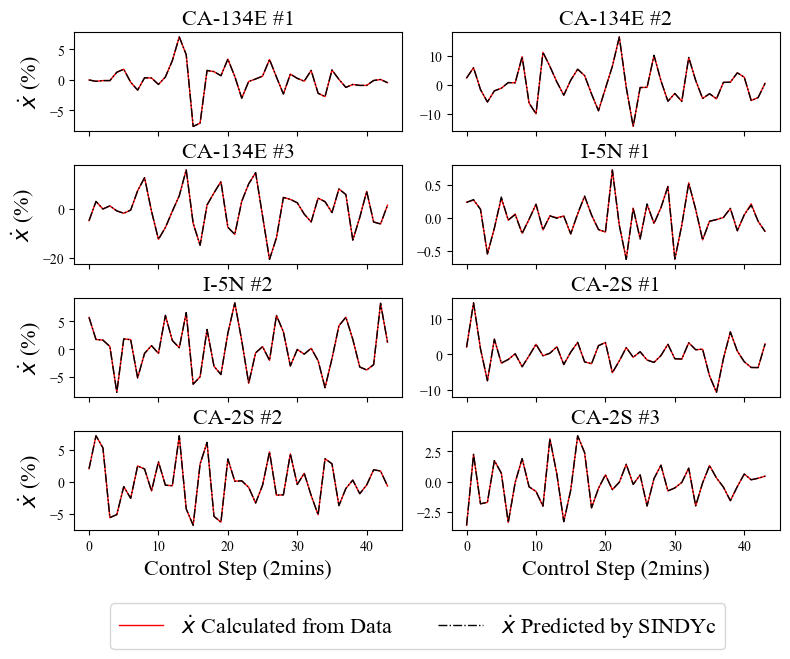

In [12]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(8, 6), sharex=True, sharey=False)
# Plot each column in a separate subplot
for row in range(4):
    for col in range(2):
        index = row*2 + col
        axs[row, col].plot(occupancy_dt.iloc[:, index], "-", label = '$\dot{x}$ Calculated from Data', color = "red",linewidth=1)
        axs[row, col].plot(occupancy_dt_pred[:, index], "-.", label = '$\dot{x}$ Predicted by SINDYc', color = "black", linewidth=1)
        axs[row, col].set_title(occupancy_all.columns[index], fontsize=16)
        # axs[row, col].set_ylim([-50, 50])

for col in range(2):
    axs[3,col].set_xlabel('Control Step (2mins)', fontsize = 16)

for row in range(4):
    axs[row,0].set_ylabel('$\dot{x}$ (%)', fontsize = 16)
    
handles, labels = axs[0,0].get_legend_handles_labels()
lgd = fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.13,-0.11), fontsize=16, ncol = 3)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.35, wspace=0.15)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()
fig.savefig('Figures/SINDy_Predict.png', dpi=300, bbox_inches='tight')